<a href="https://colab.research.google.com/github/byunmj24/MyStudy/blob/master/practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

매출이 왜 감소하고 있는가?

In [1]:
# Loading Data (라이브러리와 데이터를 불러오기)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
# 데이터를 가져와서 각 변수에 할당하기
dau = pd.read_csv('dau.csv', engine='python')
dpu = pd.read_csv('dpu.csv', engine='python')
install = pd.read_csv('install.csv', encoding="UTF-8")

In [3]:
install.head()

,install_date,app_name,user_id
0,2019-04-15,game-01,1
1,2019-04-15,game-01,2
2,2019-04-15,game-01,3
3,2019-04-15,game-01,4
4,2019-04-15,game-01,5


In [4]:
dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139112 entries, 0 to 139111
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   log_date  139112 non-null  object
 1   app_name  139112 non-null  object
 2   user_id   139112 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
# 분석을 위해 3개의 변수를 결합하기
# install + Dau + Dpu
InstallDau = install.merge(dau,  on=['user_id', 'app_name'])
InstallDau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139112 entries, 0 to 139111
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   install_date  139112 non-null  object
 1   app_name      139112 non-null  object
 2   user_id       139112 non-null  int64 
 3   log_date      139112 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.3+ MB


In [11]:
# 다시 Dpu 데이터를 결합하기
InstallDauPayment = InstallDau.merge(dpu, on=['log_date', 'app_name', 'user_id'], how='outer')

InstallDauPayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139295 entries, 0 to 139294
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   install_date  139295 non-null  object 
 1   app_name      139295 non-null  object 
 2   user_id       139295 non-null  int64  
 3   log_date      139295 non-null  object 
 4   payment       884 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [13]:
# 분석대상 데이터(InstallDauPayment)를 결측치 0으로 대체
# -> 왜 0으로? : Null 값은 계산에서 제외되기 때문입니다.
# -> 우리에게 필요한 것은 매출액 현황을 보는 것이기 때문에,
# 계산되지 않는 Null값이 아닌, 0값이 필요합니다.
InstallDauPayment = InstallDauPayment.fillna(0)

In [16]:
# 월별로 고객 현황 비교를 위해 문자 처리

# Install_date열을 기존 Install_date의 앞에서 7번쨰 값으로 치환
InstallDauPayment["install_date"] = InstallDauPayment['install_date'].str[:7]

InstallDauPayment["log_date"] = InstallDauPayment['log_date'].str[:7]

In [17]:
InstallDauPayment

,install_date,app_name,user_id,log_date,payment
0,2019-04,game-01,1,2019-06,0.0
1,2019-04,game-01,1,2019-06,0.0
2,2019-04,game-01,1,2019-06,0.0
3,2019-04,game-01,1,2019-06,0.0
4,2019-04,game-01,1,2019-06,0.0
...,...,...,...,...,...
139290,2019-07,game-01,29326,2019-07,0.0
139291,2019-07,game-01,29327,2019-07,0.0
139292,2019-07,game-01,29328,2019-07,0.0
139293,2019-07,game-01,29329,2019-07,0.0


In [18]:
# 신규 유저를 정의해보기
# -> 데이터 프레임에 'User_type'을 만들고,
# Install 날짜와 접속일자가 같다면, (신규유저)
# 그렇지 않으면 (기존고객)
InstallDauPayment['user_type'] = np.where(InstallDauPayment['log_date'] == InstallDauPayment['install_date'], 'install', 'existing')

In [19]:
InstallDauPayment[:10]

,install_date,app_name,user_id,log_date,payment,user_type
0,2019-04,game-01,1,2019-06,0.0,existing
1,2019-04,game-01,1,2019-06,0.0,existing
2,2019-04,game-01,1,2019-06,0.0,existing
3,2019-04,game-01,1,2019-06,0.0,existing
4,2019-04,game-01,1,2019-06,0.0,existing
5,2019-04,game-01,1,2019-06,0.0,existing
6,2019-04,game-01,1,2019-06,0.0,existing
7,2019-04,game-01,1,2019-06,0.0,existing
8,2019-04,game-01,1,2019-06,0.0,existing
9,2019-04,game-01,1,2019-06,0.0,existing


In [20]:
InstallDauPayment.tail()

,install_date,app_name,user_id,log_date,payment,user_type
139290,2019-07,game-01,29326,2019-07,0.0,install
139291,2019-07,game-01,29327,2019-07,0.0,install
139292,2019-07,game-01,29328,2019-07,0.0,install
139293,2019-07,game-01,29329,2019-07,0.0,install
139294,2019-07,game-01,29330,2019-07,0.0,install


In [22]:
InstallDauPayment

,install_date,app_name,user_id,log_date,payment,user_type
0,2019-04,game-01,1,2019-06,0.0,existing
1,2019-04,game-01,1,2019-06,0.0,existing
2,2019-04,game-01,1,2019-06,0.0,existing
3,2019-04,game-01,1,2019-06,0.0,existing
4,2019-04,game-01,1,2019-06,0.0,existing
...,...,...,...,...,...,...
139290,2019-07,game-01,29326,2019-07,0.0,install
139291,2019-07,game-01,29327,2019-07,0.0,install
139292,2019-07,game-01,29328,2019-07,0.0,install
139293,2019-07,game-01,29329,2019-07,0.0,install


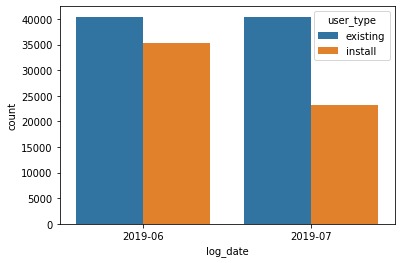

In [23]:
sns.countplot(data=InstallDauPayment, x='log_date', hue='user_type')

In [28]:
grouped = InstallDauPayment['payment'].groupby([InstallDauPayment['log_date'], InstallDauPayment['user_type']]).sum()

In [29]:
grouped

log_date  user_type
2019-06   existing     1778860.0
          install       498370.0
2019-07   existing     1778860.0
          install       291990.0
Name: payment, dtype: float64

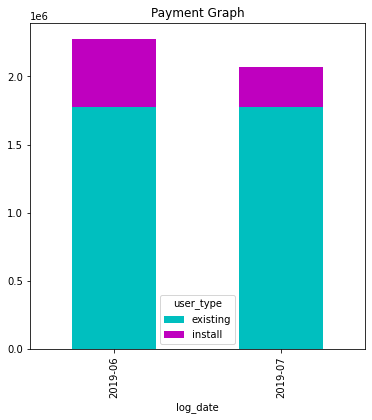

In [32]:
grouped.unstack().plot(kind='bar', stacked=True, color=["c", 'm'], grid=False, figsize=[6,6], title='Payment Graph')

In [33]:
df = InstallDauPayment.set_index("user_type")

In [35]:
df.drop('existing', inplace = True)

In [36]:
df = df.set_index('payment')

In [37]:
df.drop(0, inplace = True)

In [38]:
df = df.reset_index